# 분류분석 모형의 종류

# 확률적 모형

# 확률적 생성 모형

## QDA

* 분류용 데이터 생성

In [1]:
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0,                           
                           n_clusters_per_class=1, n_classes=2,
                           random_state=9)

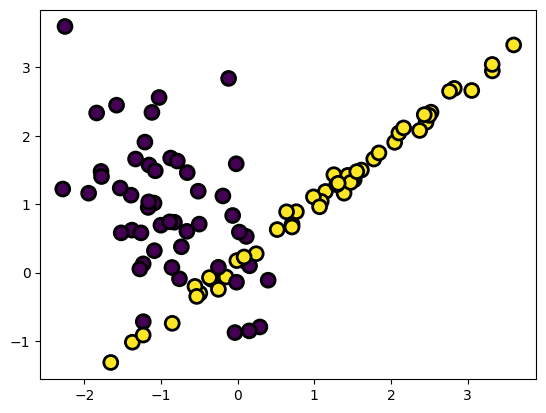

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.show()

In [4]:
X[y==1,:] = -(X[y==0,:])

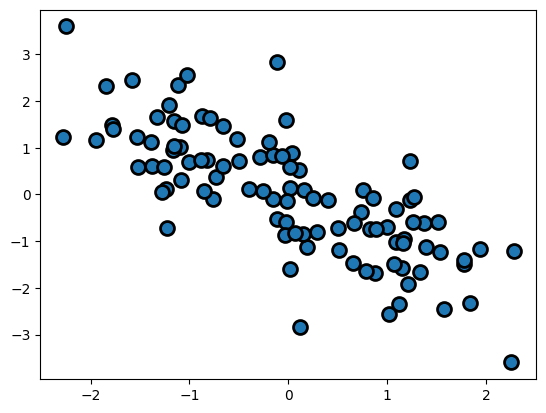

In [5]:
plt.scatter(X[:,0], X[:,1], marker='o', s=100, edgecolor='k', linewidth=2)
plt.show()

### QDA

In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

QuadraticDiscriminantAnalysis()

In [7]:
x = [[0, 0]]
p = model.predict_proba(x)[0]
print(p)

[0.5 0.5]


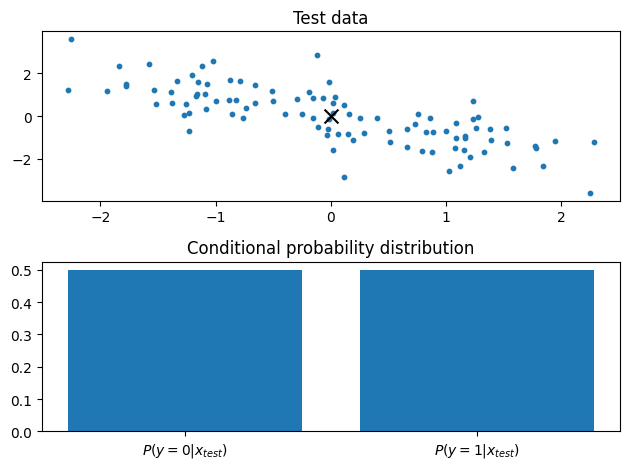

In [8]:
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c='k', s=100, marker='x')
plt.title("Test data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

In [9]:
x = [[-0.5, 0]]
p = model.predict_proba(x)[0]
print(p)

[0.83544581 0.16455419]


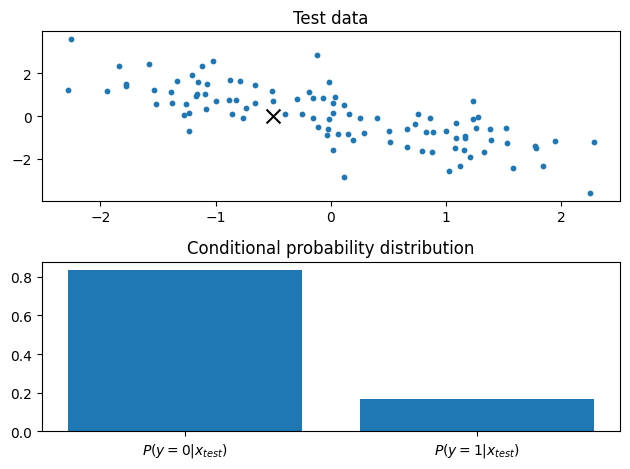

In [10]:
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c='k', s=100, marker='x')
plt.title("Test data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

In [11]:
x = [[0.5, 0]]
p = model.predict_proba(x)[0]
print(p)

[0.16455419 0.83544581]


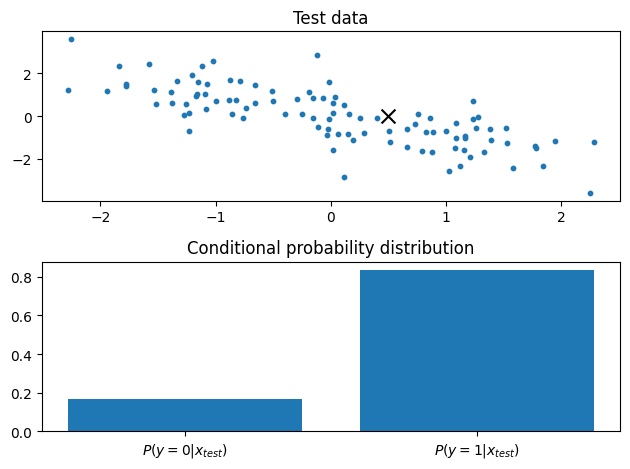

In [12]:
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c='k', s=100, marker='x')
plt.title("Test data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

## 나이브베이즈 모형

In [13]:
import seaborn as sns
iris = sns.load_dataset("iris")
X = iris.iloc[:,:-1]
y = iris.species

In [14]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X, y)

MultinomialNB()

In [15]:
test_X = [[5.0, 3.4, 1.2, 0.25]]
model.predict(test_X)

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array(['setosa'], dtype='<U10')

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


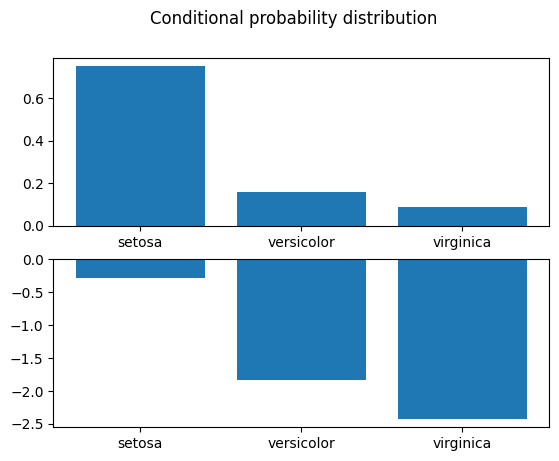

In [16]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(test_X)[0])
plt.xticks(model.classes_)
plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(test_X)[0])
plt.xticks(model.classes_)
plt.suptitle("Conditional probability distribution")
plt.show()

# 확률적 판별 모형

## 로지스틱 회귀

In [17]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=1, n_redundant=0,
                           n_informative=1, n_clusters_per_class=1, 
                           random_state=1)

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X, y)

In [19]:
import numpy as np
xx = np.linspace(-3, 3, 100)
XX = xx[:, np.newaxis]
prob = model.predict_proba(XX)[:, 1]

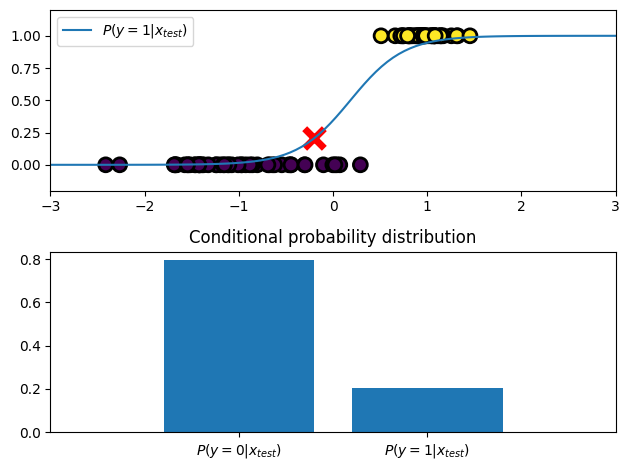

In [20]:
import matplotlib.pyplot as plt

test_X = [[-0.2]]
plt.subplot(211)
plt.plot(xx, prob)
plt.scatter(X, y, marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(test_X[0], model.predict_proba(test_X)[0][1:], marker='x', 
            s=200, c='r', lw=5)
plt.xlim(-3, 3)
plt.ylim(-.2, 1.2)
plt.legend(["$P(y=1|x_{test})$"])
plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(test_X)[0])
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.title("Conditional probability distribution")
plt.tight_layout()
plt.show()

In [21]:
model.decision_function(X)
# -6.47675595, -2.90333928, -6.05568042,  1.66854954, -2.29346472,

array([-6.47675595, -2.90333928, -6.05568042,  1.66854954, -2.29346472,
        3.76658883, -6.53642977, -2.21696221, -6.53485884, -9.12818464,
        3.1372054 ,  2.61749881,  3.03085131, -1.00570071, -5.4813945 ,
       -4.8569594 , -5.01738774, -2.5597006 ,  1.97445863,  2.46202161,
       -5.60978176,  2.83187701, -3.4726056 , -3.01655487, -4.05148693,
        2.20507677,  2.16870239,  3.46073267, -5.80392988,  0.37151157,
       -0.5085799 , -5.6367191 ,  2.56869611,  2.77244915,  2.40394793,
        4.00425968, -2.82912532, -5.98521109,  2.62968563, -0.65556931,
        3.96673498,  2.68490833, -3.9018172 ,  3.39474523,  3.14382195,
       -3.07668314,  2.21375217, -1.71430181, -5.64415356, -0.39558571,
       -2.21537647,  1.92143228,  1.14390194,  1.87891704, -5.53586435,
        2.17577292, -3.65523492,  2.92578719,  3.36958147,  2.4812591 ,
       -1.69066095,  3.263775  , -4.42635184, -5.77361099,  2.64117768,
        2.31615277,  4.45981846,  2.26573434,  3.1011438 , -0.57

In [22]:
print(y[:5])

[0 0 0 1 0]


## 의사결정나무

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[:, 2:]
y = iris.target
feature_names = iris.feature_names[2:]

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt_model = DecisionTreeClassifier(criterion='entropy',
                                  random_state=0)

In [26]:
dt_model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
# import io
# from sklearn.tree import export_graphviz
# import pydot
# from IPython.core.display import Image

In [28]:
# def draw_decision_tree(model, feature_names):
#     dot_buf = io.StringIO()
#     export_graphviz(model, out_file=dot_buf,
#                     feature_names=feature_names)
#     graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
#     image = graph.create_png()
#     return Image(image)

In [29]:
# # import numpy as np
# # import matplotlib as mpl
# def plot_decision_regions(X, y, model, title):
#     resolution = 0.01
#     markers = ('s', '^', 'o')
#     colors = ('red', 'blue', 'lightgreen')
#     cmap = mpl.colors.ListedColormap(colors)

#     x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
#                            np.arange(x2_min, x2_max, resolution))
#     Z = model.predict(
#         np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

#     plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
#     plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
#     plt.xlim(xx1.min(), xx1.max())
#     plt.ylim(xx2.min(), xx2.max())

#     for idx, cl in enumerate(np.unique(y)):
#         plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
#                     c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

#     plt.xlabel(data.feature_names[2])
#     plt.ylabel(data.feature_names[3])
#     plt.legend(loc='upper left')
#     plt.title(title)

#     return Z

In [30]:
# draw_decision_tree(dt_model, 
#                    feature_names=iris.feature_names[2:])

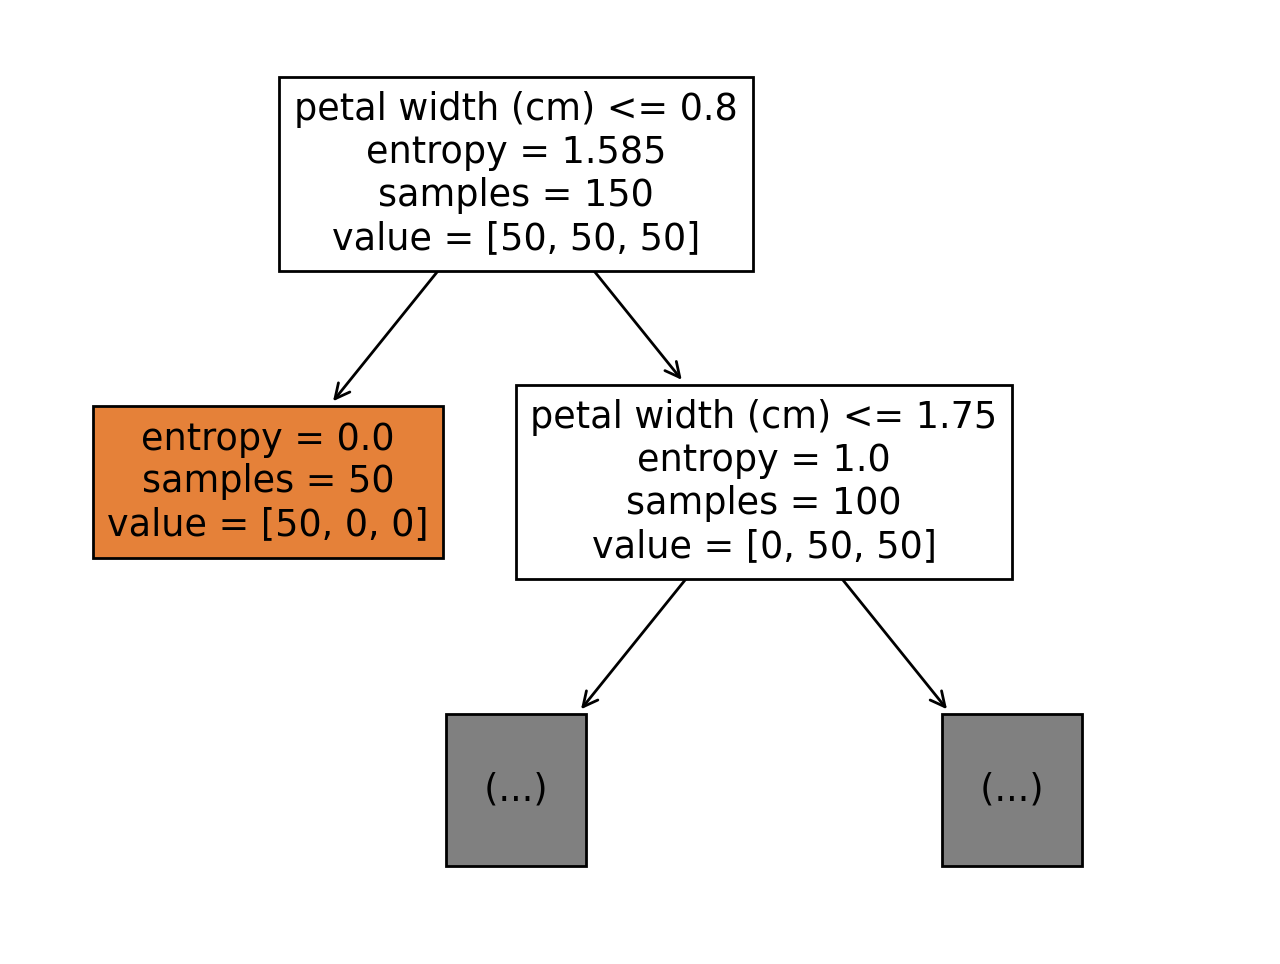

In [31]:
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(8,6))
plot_tree(dt_model, max_depth=1, filled=True, 
          feature_names=iris.feature_names[2:])
plt.show()

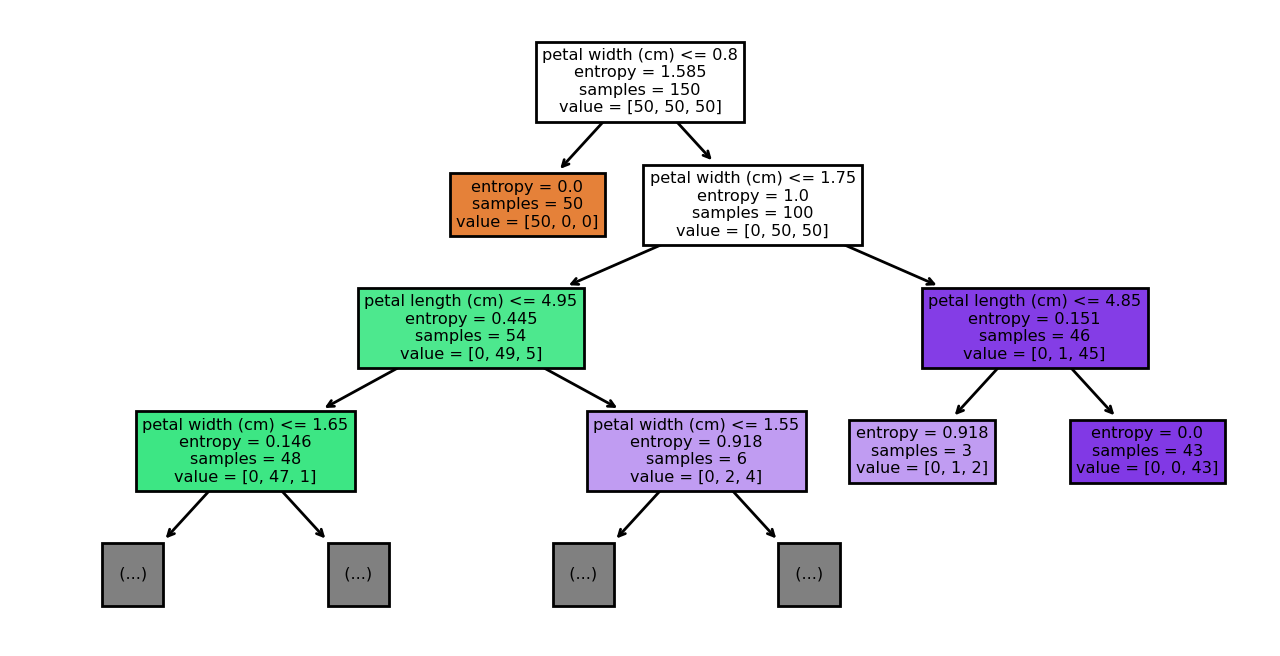

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(8,4))
plot_tree(dt_model, max_depth=3, filled=True, 
          feature_names=iris.feature_names[2:])
plt.show()

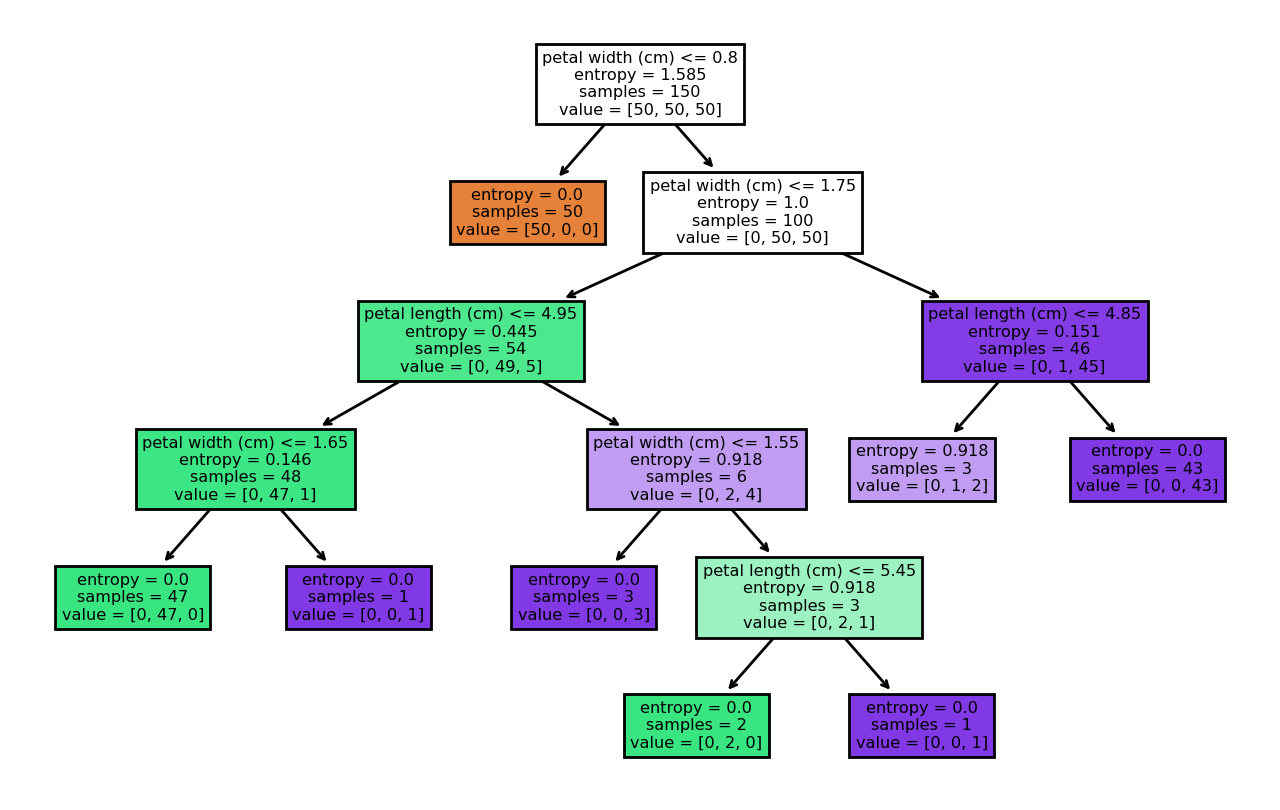

In [33]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(8,5))
plot_tree(dt_model, filled=True, 
          feature_names=iris.feature_names[2:])
plt.show()

# 판별함수 기반 모형

## 퍼셉트론

In [34]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
idx = np.in1d(iris.target, [0,2]) #1D배열요소가 두 번째 배열에 있는지 확인
X = iris.data[idx, 0:2]
y = iris.target[idx]

In [35]:
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter=100, random_state=1).fit(X, y)

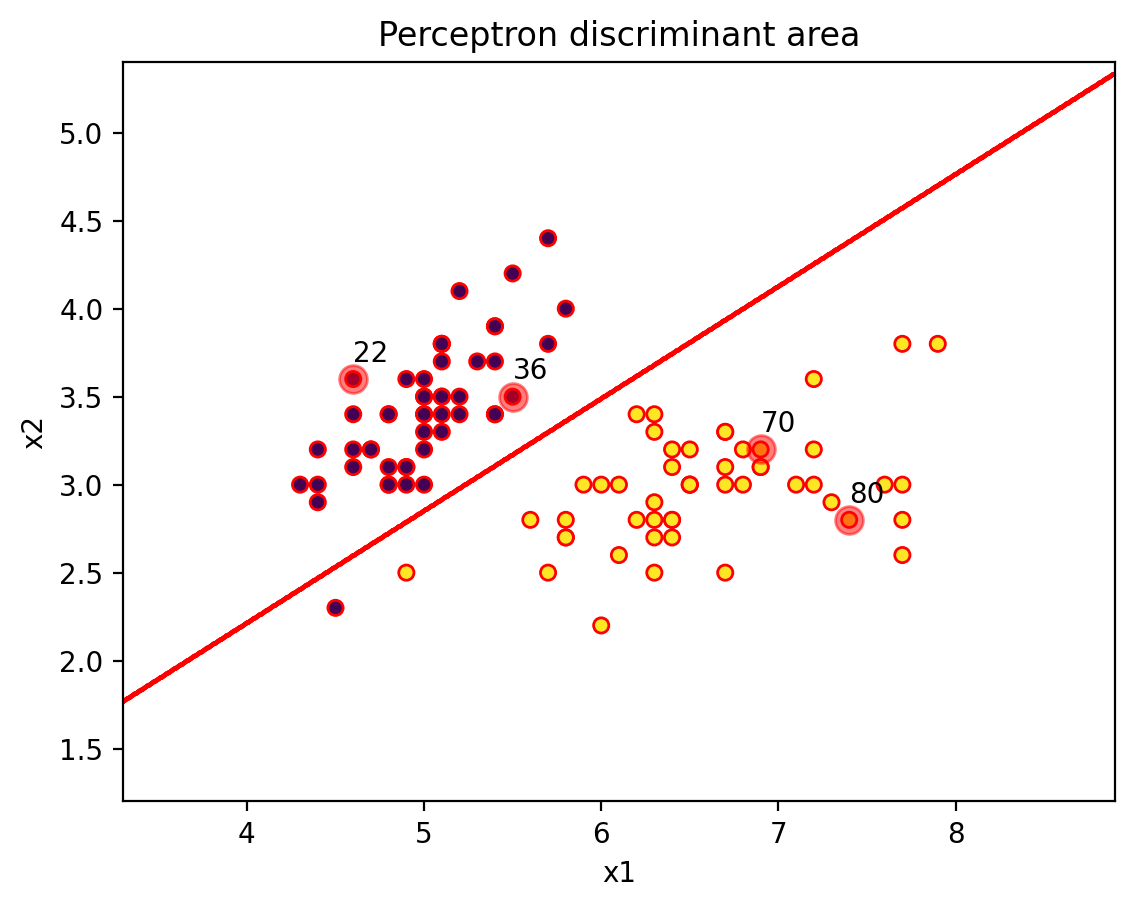

In [36]:
import matplotlib.pyplot as plt

X_min, X_max = X[:, 0].min()-1, X[:, 0].max()+1 # x축 한계
Y_min, Y_max = X[:, 1].min()-1, X[:, 1].max()+1 # y축 한계

# contour() 함수를 이용해 그래프를 그리려면 XX, YY는 2차원여야 함
XX, YY = np.meshgrid(np.linspace(X_min, X_max, 1000),
                     np.linspace(Y_min, Y_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

# contour() 함수는 등고선을 그려줌, x,y,z 매개변수 모두 2차원여야 함
plt.contour(XX, YY, ZZ, colors='r') # 이 예에서는 경계선을 그려줌
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='r', linewidth=1)

idx = [22, 36, 70, 80]
plt.scatter(X[idx, 0], X[idx, 1], c='r', s=100, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1] + 0.1))
plt.title("Perceptron discriminant area")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

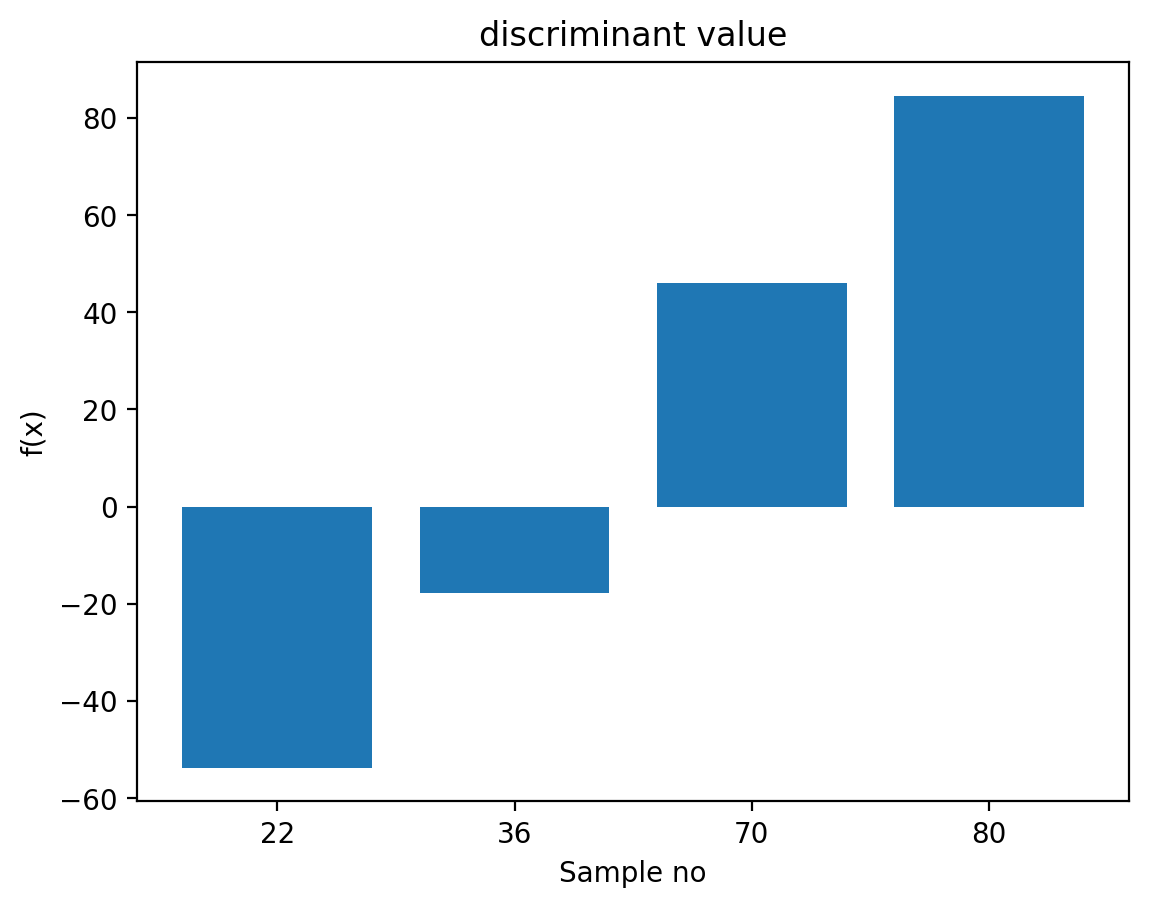

In [37]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.title("discriminant value")
plt.xlabel("Sample no")
plt.ylabel("f(x)")
plt.show()

## 커널 SVM

In [38]:
import numpy as np
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

In [39]:
from sklearn.svm import SVC
model = SVC()
model.fit(X, Y)

SVC()

In [40]:
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

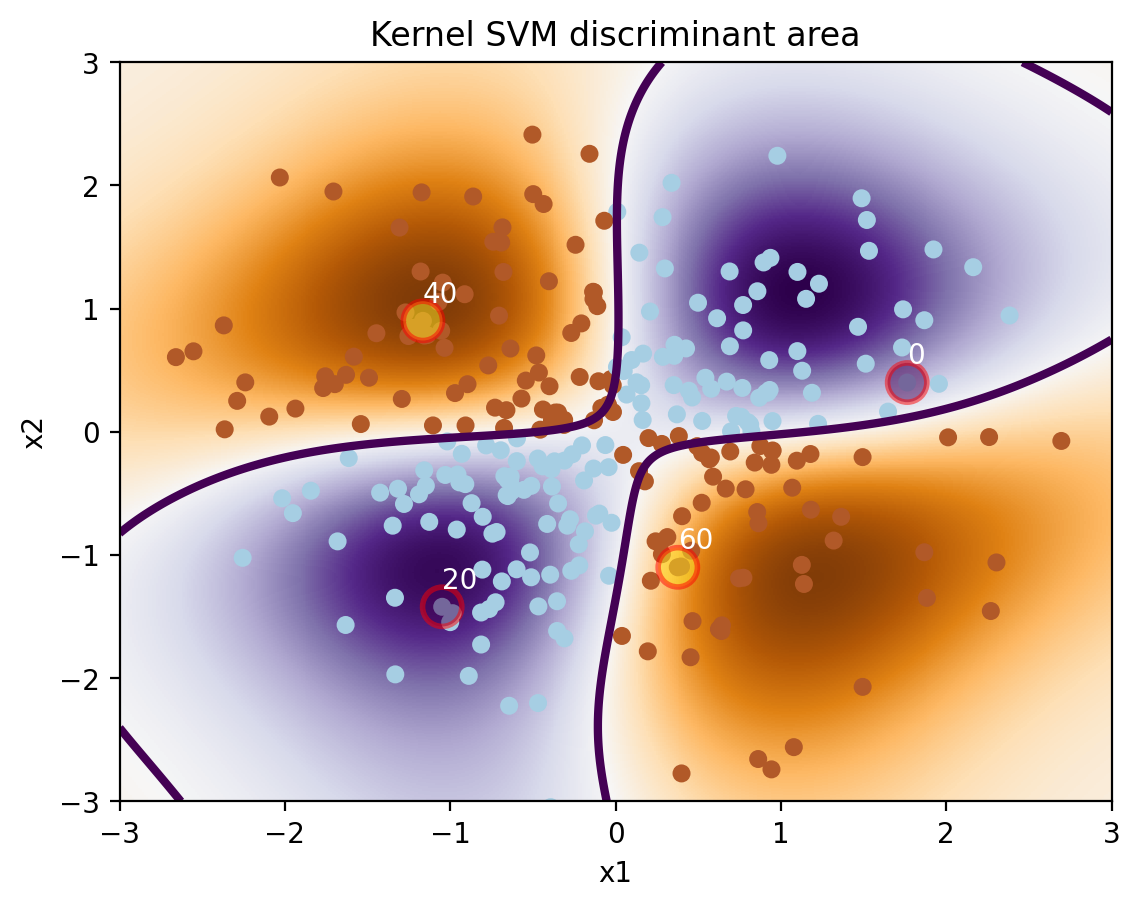

In [41]:
import matplotlib.pyplot as plt
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=3)
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
idx = [0, 20, 40, 60]
plt.scatter(X[idx, 0], X[idx, 1], c=Y[idx], 
            s=200, alpha=0.5, edgecolor='r', linewidth=2)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1]+0.15), color='white')
plt.grid(False)
plt.axis([-3, 3, -3, 3])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Kernel SVM discriminant area")
plt.show()

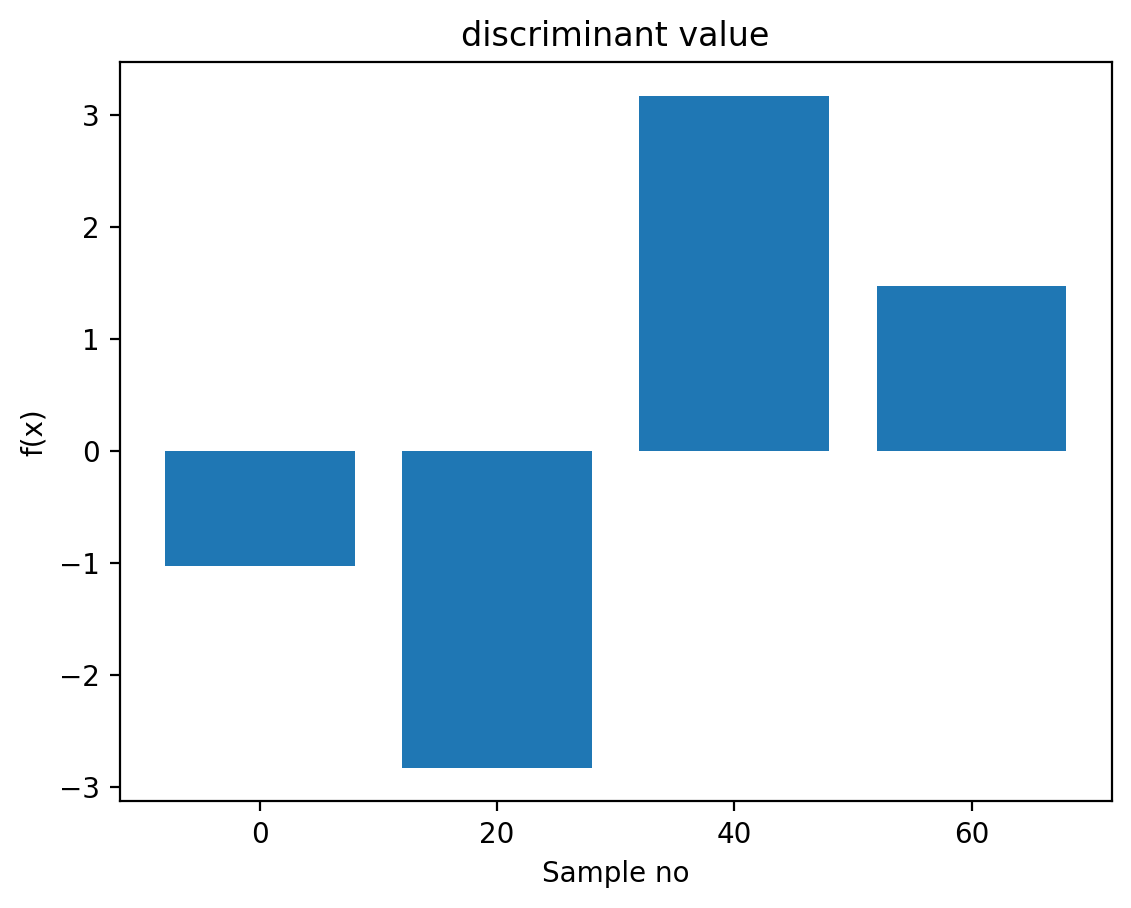

In [42]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.title("discriminant value")
plt.xlabel("Sample no")
plt.ylabel("f(x)")
plt.show()

# 다중 클래스 분류

In [43]:
from sklearn.datasets import load_iris
iris = load_iris()

## OvO

In [44]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

model_ovo = OneVsOneClassifier(LogisticRegression())
model_ovo.fit(iris.data, iris.target)

OneVsOneClassifier(estimator=LogisticRegression())

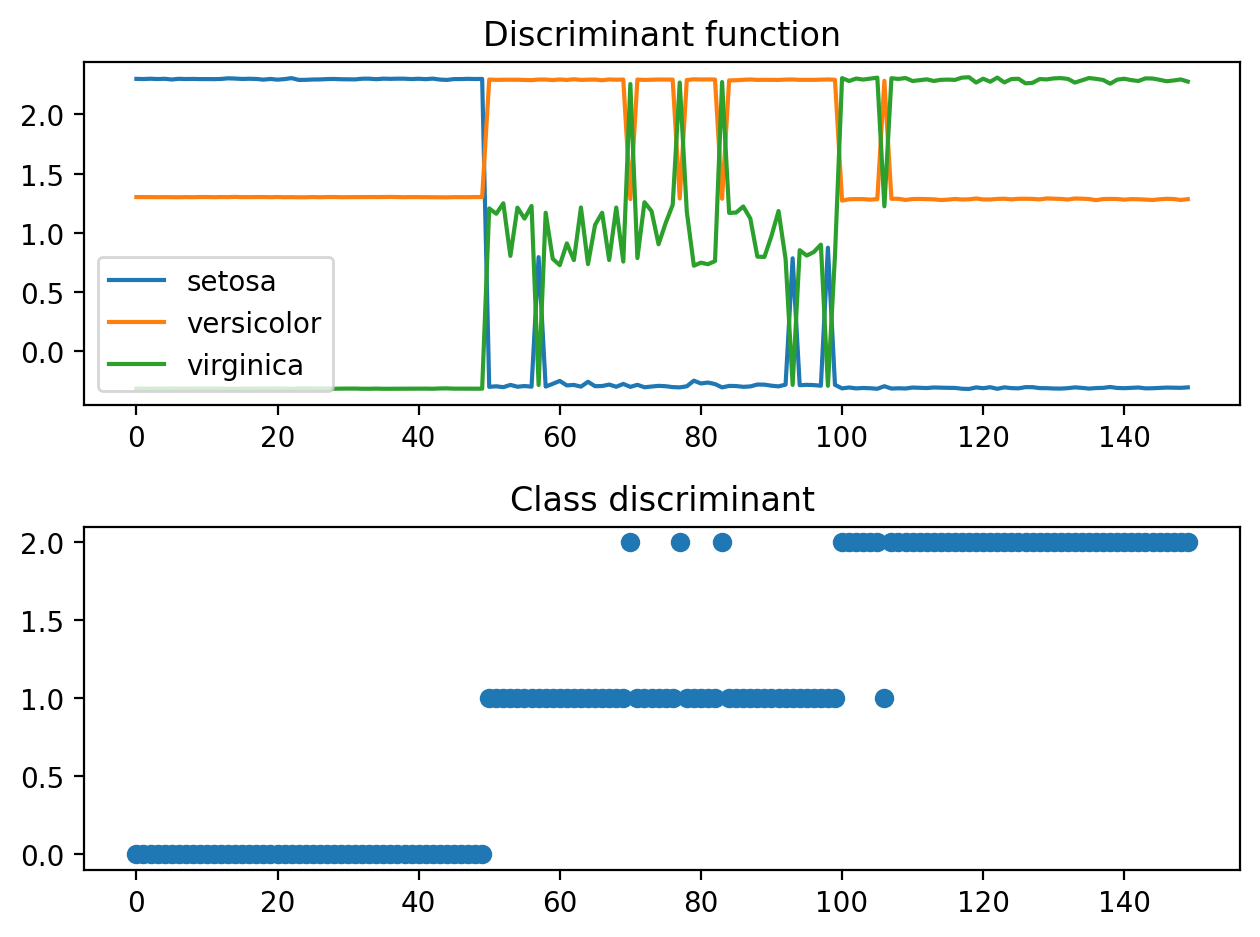

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

ax1 = plt.subplot(211)
disc1 = model_ovo.decision_function(iris.data)
df1 = pd.DataFrame(disc1)
plt.plot(df1)
plt.legend(["setosa", "versicolor", "virginica"])
plt.title("Discriminant function")

ax2 = plt.subplot(212)
disc2 = model_ovo.predict(iris.data)
df2 = pd.DataFrame(disc2, columns=["prediction"])
plt.scatter(range(150), df2)
plt.title("Class discriminant")
plt.tight_layout()
plt.show()

In [46]:
df1.iloc[50:100]

,0,1,2
50,-0.300195,2.293847,1.205964
51,-0.295694,2.291245,1.161164
52,-0.303298,2.292321,1.249374
53,-0.283721,2.292307,0.805202
54,-0.299531,2.292174,1.212676
55,-0.293404,2.290510,1.120232
56,-0.298775,2.289048,1.226441
57,0.794648,2.293916,-0.284686
58,-0.298133,2.293809,1.169625
59,-0.274936,2.289667,0.780598


## OvR

In [47]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

model_ovr = OneVsRestClassifier(LogisticRegression())
model_ovr.fit(iris.data, iris.target)

OneVsRestClassifier(estimator=LogisticRegression())

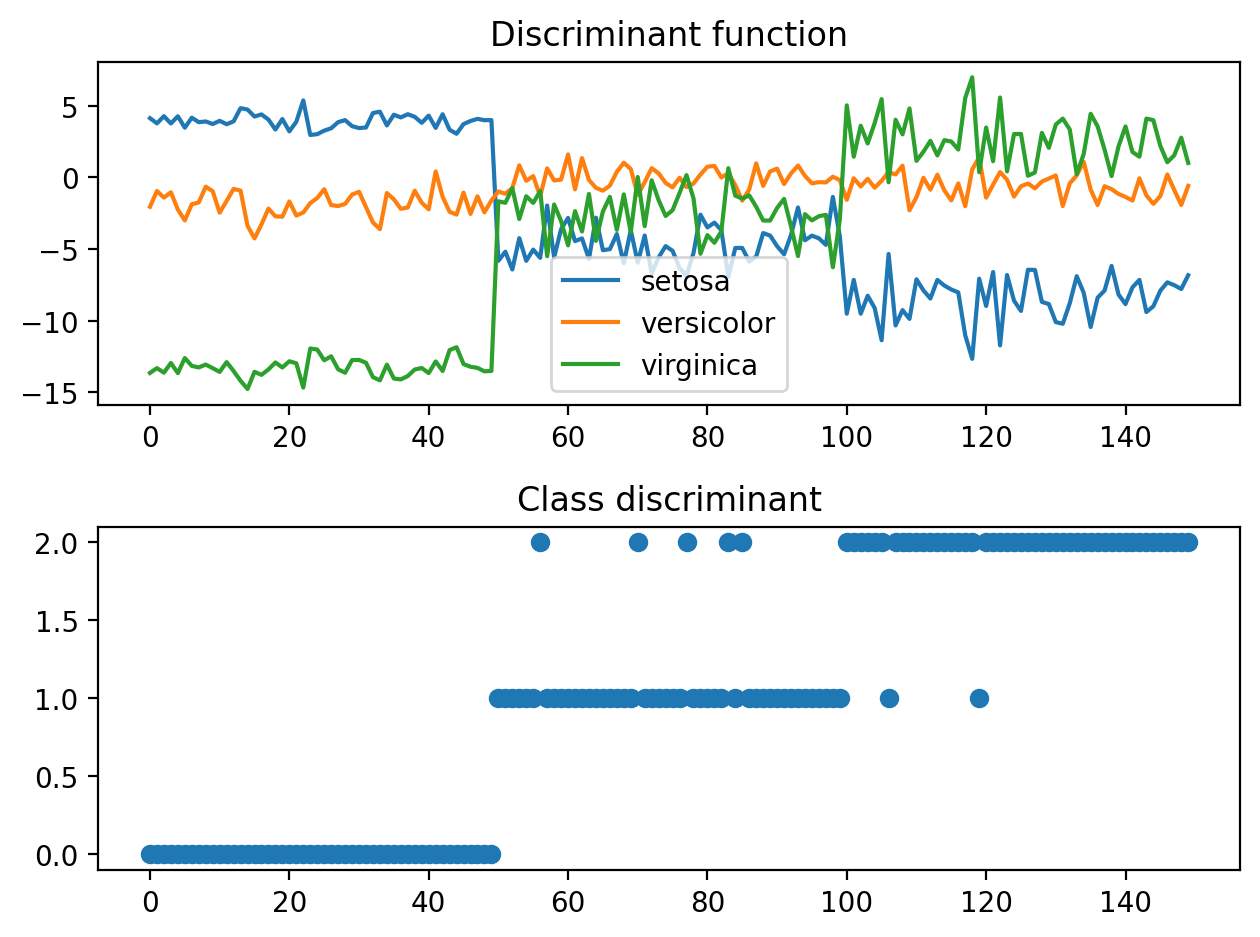

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

ax1 = plt.subplot(211)
disc1 = model_ovr.decision_function(iris.data)
df1 = pd.DataFrame(disc1)
plt.plot(df1)
plt.legend(["setosa", "versicolor", "virginica"])
plt.title("Discriminant function")

ax2 = plt.subplot(212)
disc2 = model_ovr.predict(iris.data)
df2 = pd.DataFrame(disc2, columns=["prediction"])
plt.scatter(range(150), df2)
plt.title("Class discriminant")
plt.tight_layout()
plt.show()